In [32]:
# (1) 데이터 가져오기
# sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
# diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

# (2) 모델에 입력할 데이터 X 준비하기
# df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
# (3) 모델에 예측할 데이터 y 준비하기
# df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.
# (4) train 데이터와 test 데이터로 분리하기
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.
# (5) 모델 준비하기
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
# 모델 함수를 구현해주세요.
# (6) 손실함수 loss 정의하기
# 손실함수를 MSE 함수로 정의해주세요.
# (7) 기울기를 구하는 gradient 함수 구현하기
# 기울기를 계산하는 gradient 함수를 구현해주세요.
# (8) 하이퍼 파라미터인 학습률 설정하기
# 학습률, learning rate 를 설정해주세요
# 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.
# (9) 모델 학습하기
# 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
# loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
# 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.
# (10) test 데이터에 대한 성능 확인하기
# test 데이터에 대한 성능을 확인해주세요.
# (11) 정답 데이터와 예측한 데이터 시각화하기
# x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

In [33]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

diabetes=load_diabetes()

In [34]:
df_X=diabetes.data
df_y=diabetes.target

X = df_X[:10]
y = df_y[:10]
# type(X)
# X

In [35]:
#입력데이터, 타겟의 shape 
df_X.shape, df_y.shape

((442, 10), (442,))

In [36]:
#입력 데이터 살펴보기. (10개의 특성 중 3번째 1개의 특성과 타겟 데이터로 산점도 그리기)
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [37]:
#타겟 데이터 살펴보기
diabetes.target[:3]

array([151.,  75., 141.])

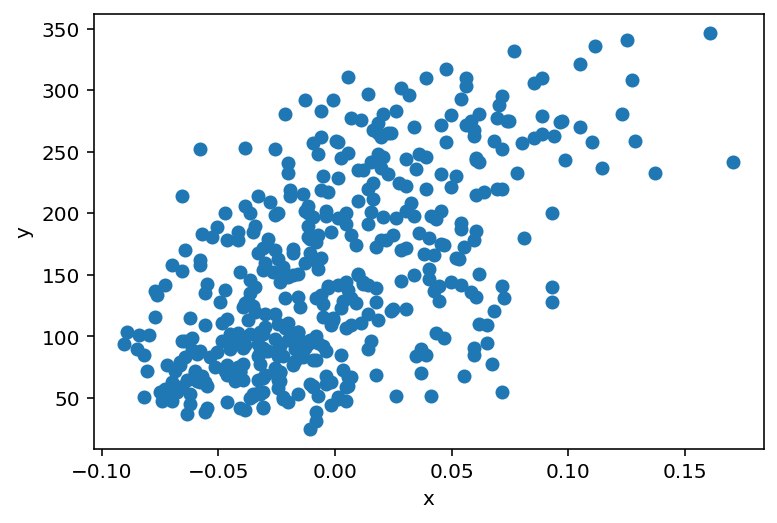

In [38]:
# 10개의 특성 중 3번째 특성(bmi:체질량지수)과 타겟 데이터로 산점도 그리기)
# 입력데이터와 타겟의 관계를
# 산점도 그려보기

import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#산점도를 보면, 입력 데이터와 타겟이 비례 관계에 있다는 것을 알 수 있다.(양의 상관관계)

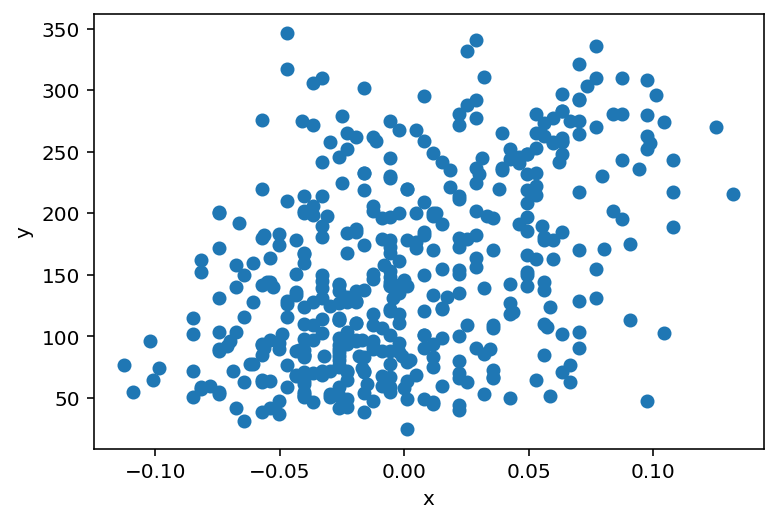

In [39]:
# 10개의 특성 중 4번째 특성(bp:혈압)과 타겟 데이터로 산점도 그리기)
# 입력데이터와 타겟의 관계를
# 산점도 그려보기
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,3], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#산점도를 보면, 입력 데이터(혈압)와 타겟이 비례 관계에 있다는 것을 알 수 있다.(양의 상관관계)
## 혈압과의 관계가 궁금해서 추가해서 확인해 보았다. 하지만, bmi 보다 오차가 크게 보인다.

In [40]:
print(diabetes.DESCR)

#데이터 특성에 대한 참고
# age : 나이
# sex : 성별
# bmi : 체질량지수
# bp : 평균 혈압
# s1 : 혈중 총콜레스테롤
# s2 : 저밀도 지질단백질
# s3 : 고밀도 지질단백질
# s4 : 총 콜레스테롤 수치
# s5 : 혈중 트리글리세라이드 수치
# s6 : 혈당 수치

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [41]:
# feature
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [42]:
diabetes.target

# 당뇨병 데이터 세트 (원본)
# Ten baseline variables, age, sex, body mass index, average blood
# pressure, and six blood serum measurements were obtained for each of n =
# 442 diabetes patients, as well as the response of interest, a
# quantitative measure of disease progression one year after baseline.

# 당뇨병 데이터 세트 (번역/해석)
# ----------------

# 10개의 기본 변수, 연령, 성별, 체질량 지수, 평균 혈액
# n = 각각에 대해 6개의 혈청 측정치를 얻었다.
# 당뇨병 환자 442명 뿐만 아니라 관심의 응답,
# 베이스라인 1년 후 질병 진행의 정량적 측정.

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [43]:
# 데이터프레임 보기 쉽게 만들고, target 열 추가.
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [44]:
#데이터 개수 확인
print(diabetes_df.info)

<bound method DataFrame.info of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  

In [45]:
#상관계수 구하기
#연관성이 높은 feature 알아보자.
corr1 = diabetes_df.corr()
corr1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [46]:
# 위의 산점도에서 인풋데이터와 타겟의 관계는 비례 관계에 있다는 것을 알고 있다. 
#  각 특성별로 어떤 관계가 있는지 알아보자.

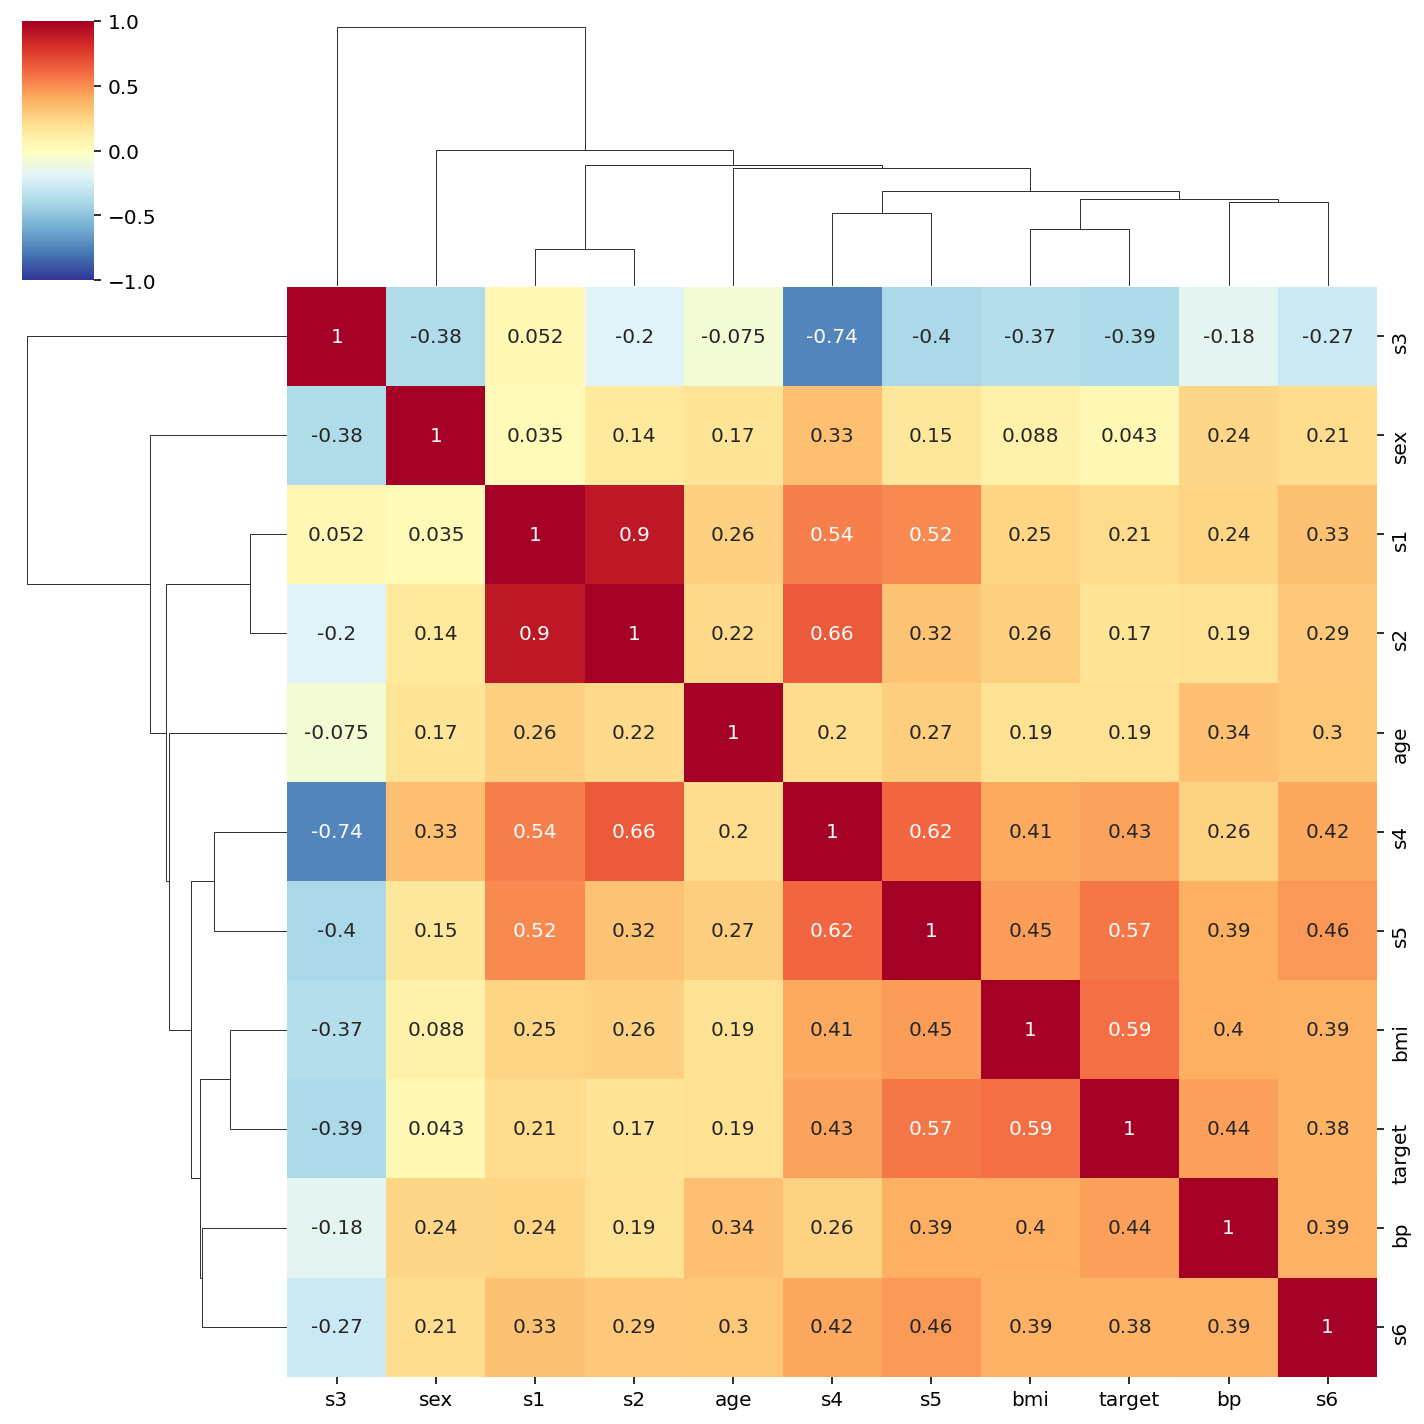

In [47]:
# 시각화하기
sns.clustermap(corr1,
              annot = True,  # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax =1,  # 컬러차트 -1~1 범위로 표시
              )

In [48]:
# (4) train 데이터와 test 데이터로 분리하기
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(353, 10) (353,)
(89, 10) (89,)


In [49]:
# 길이가 10인 w 와 1개의 숫자인 b를 준비합니다.
# y = wx+b
# (5) 모델 준비하기
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
# 모델 함수를 구현해주세요.
import numpy as np
W = np.random.rand(10)
b = np.random.rand()
W,b

(array([0.57379652, 0.64939088, 0.39995308, 0.04879776, 0.78590381,
        0.07044508, 0.86070967, 0.80942432, 0.47433242, 0.58196579]),
 0.9729716812765808)

In [50]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")

슝=3


In [51]:
# (6) 손실함수 loss 정의하기
# 손실함수를 MSE 함수로 정의해주세요.
# MSE 값이 작을수록 잘 예측한 것.

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("슝=3")

슝=3
슝=3


In [52]:
# (7) 기울기를 구하는 gradient 함수 구현하기
# 기울기를 계산하는 gradient 함수를 구현해주세요.

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("슝=3")

슝=3


In [53]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)


dW: [ 5.7265862   1.24815289 -2.53986004  3.72619213  4.51244204  3.70085846
  3.43562138  1.95042778 -0.63660011  7.71481508]
db: -283.3512310384466


In [54]:
# 학습률
LEARNING_RATE = 0.0001

In [55]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 29311.3042
Iteration 20 : Loss 29218.4122
Iteration 30 : Loss 29125.8908
Iteration 40 : Loss 29033.7385
Iteration 50 : Loss 28941.9537
Iteration 60 : Loss 28850.5351
Iteration 70 : Loss 28759.4812
Iteration 80 : Loss 28668.7905
Iteration 90 : Loss 28578.4615
Iteration 100 : Loss 28488.4929
Iteration 110 : Loss 28398.8831
Iteration 120 : Loss 28309.6308
Iteration 130 : Loss 28220.7345
Iteration 140 : Loss 28132.1928
Iteration 150 : Loss 28044.0043
Iteration 160 : Loss 27956.1676
Iteration 170 : Loss 27868.6812
Iteration 180 : Loss 27781.5439
Iteration 190 : Loss 27694.7540
Iteration 200 : Loss 27608.3104
Iteration 210 : Loss 27522.2116
Iteration 220 : Loss 27436.4562
Iteration 230 : Loss 27351.0429
Iteration 240 : Loss 27265.9703
Iteration 250 : Loss 27181.2370
Iteration 260 : Loss 27096.8417
Iteration 270 : Loss 27012.7830
Iteration 280 : Loss 26929.0596
Iteration 290 : Loss 26845.6701
Iteration 300 : Loss 26762.6133
Iteration 310 : Loss 26679.8877
Iteration 320 : L